In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Load the data
post = pd.read_csv('../data/temp/reddit_post.csv')
author = pd.read_csv('../data/temp/unique_author.csv')

In [6]:
def split_data(data: pd.DataFrame):
    data["mbti_0"] = data["mbti"].apply(lambda x: x[0])
    data["mbti_1"] = data["mbti"].apply(lambda x: x[1])
    data["mbti_2"] = data["mbti"].apply(lambda x: x[2])
    data["mbti_3"] = data["mbti"].apply(lambda x: x[3])
    
split_data(post)
split_data(author)

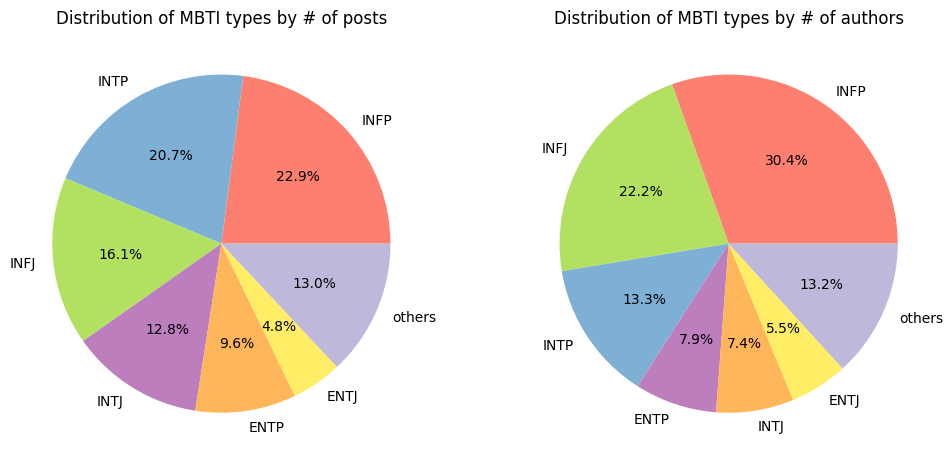

In [7]:
# plot a pie chart with the distribution of the different MBTI types
# for groups less than 4%, show them as "others" and use gray color 
def pie_percentage(data: pd.DataFrame):
    sizes = data["mbti"].value_counts(normalize=True)
    sizes = sizes[sizes > 0.04]
    sizes["others"] = 1 - sizes.sum()
    return sizes
    
colors8 = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db"]
colors7 = ["#fd7f6f", "#b2e061", "#7eb0d5", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
post_sizes = pie_percentage(post)
author_sizes = pie_percentage(author)

ax[0].pie(post_sizes, labels=post_sizes.index, autopct='%1.1f%%', colors=colors8)
ax[0].set_title("Distribution of MBTI types by # of posts")

ax[1].pie(author_sizes, labels=author_sizes.index, autopct='%1.1f%%', colors=colors7)
ax[1].set_title("Distribution of MBTI types by # of authors")

plt.show()

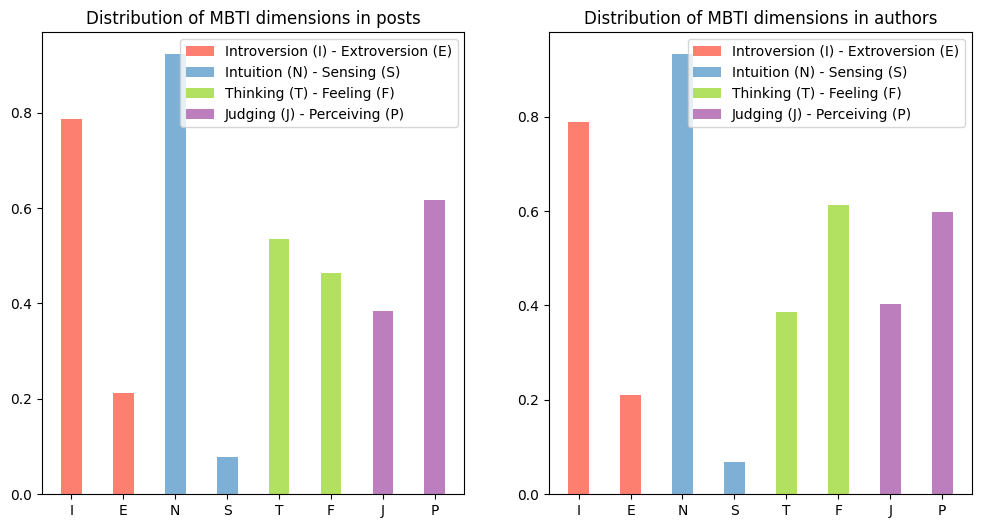

In [8]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"]
labels = ["Introversion (I) - Extroversion (E)", "Intuition (N) - Sensing (S)", "Thinking (T) - Feeling (F)", "Judging (J) - Perceiving (P)"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(4):
    post_data = post[f"mbti_{i}"].value_counts(normalize=True).sort_index()
    author_data = author[f"mbti_{i}"].value_counts(normalize=True).sort_index()
    
    # Ensure we have exactly 2 values for each dimension
    post_values = [post_data.get('I', 0), post_data.get('E', 0)] if i == 0 else \
                  [post_data.get('N', 0), post_data.get('S', 0)] if i == 1 else \
                  [post_data.get('T', 0), post_data.get('F', 0)] if i == 2 else \
                  [post_data.get('J', 0), post_data.get('P', 0)]
                  
    author_values = [author_data.get('I', 0), author_data.get('E', 0)] if i == 0 else \
                    [author_data.get('N', 0), author_data.get('S', 0)] if i == 1 else \
                    [author_data.get('T', 0), author_data.get('F', 0)] if i == 2 else \
                    [author_data.get('J', 0), author_data.get('P', 0)]
    
    ax[0].bar(np.arange(2) + i * 2, post_values, width=0.4, label=labels[i], color=colors[i])
    ax[1].bar(np.arange(2) + i * 2, author_values, width=0.4, label=labels[i], color=colors[i])

# Set x-ticks and labels for the first plot
ax[0].set_xticks(np.arange(8))
ax[0].set_xticklabels(['I', 'E', 'N', 'S', 'T', 'F', 'J', 'P'])
ax[0].set_title("Distribution of MBTI dimensions in posts")
ax[0].legend()

# Set x-ticks and labels for the second plot
ax[1].set_xticks(np.arange(8))
ax[1].set_xticklabels(['I', 'E', 'N', 'S', 'T', 'F', 'J', 'P'])
ax[1].set_title("Distribution of MBTI dimensions in authors")
ax[1].legend()

plt.show()


Text(0, 0.5, 'Number of authors')

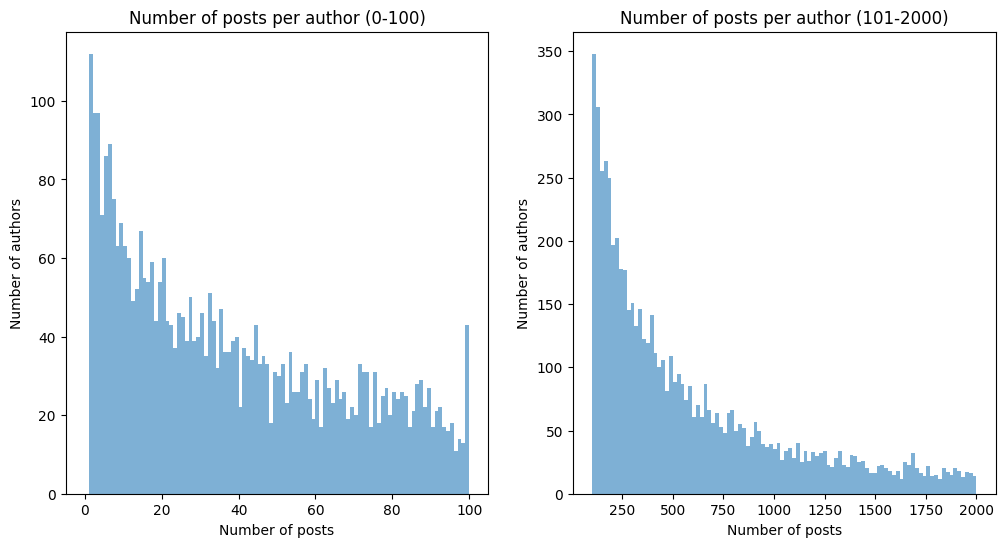

In [9]:
# count the number of posts per author and plot a histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

post_author = post["author"].value_counts()

ax[0].hist(post_author, bins=100, range=(0, 100), color="#7eb0d5")
ax[0].set_title("Number of posts per author (0-100)")
ax[0].set_xlabel("Number of posts")
ax[0].set_ylabel("Number of authors")

# plot a histogram from range 0 to 500 
ax[1].hist(post_author, bins=100, range=(101, 2000), color="#7eb0d5")
ax[1].set_title("Number of posts per author (101-2000)")
ax[1].set_xlabel("Number of posts")
ax[1].set_ylabel("Number of authors")


In [10]:
# read in the reddit_post_combined.csv file
post_combined = pd.read_csv('../data/temp/reddit_post_combined.csv')
mbtis = post_combined["mbti"] 

Text(0.5, 1.0, 'Distribution of MBTI types in combined posts')

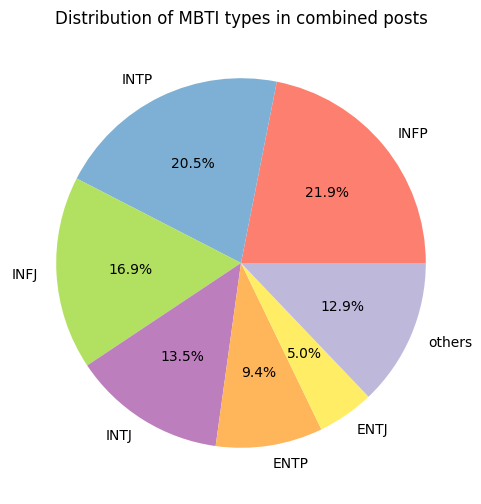

In [11]:
# plot a pie chart with the distribution of the different MBTI types

sizes = mbtis.value_counts(normalize=True)
sizes = sizes[sizes > 0.04]
sizes["others"] = 1 - sizes.sum()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=colors8)
ax.set_title("Distribution of MBTI types in combined posts")

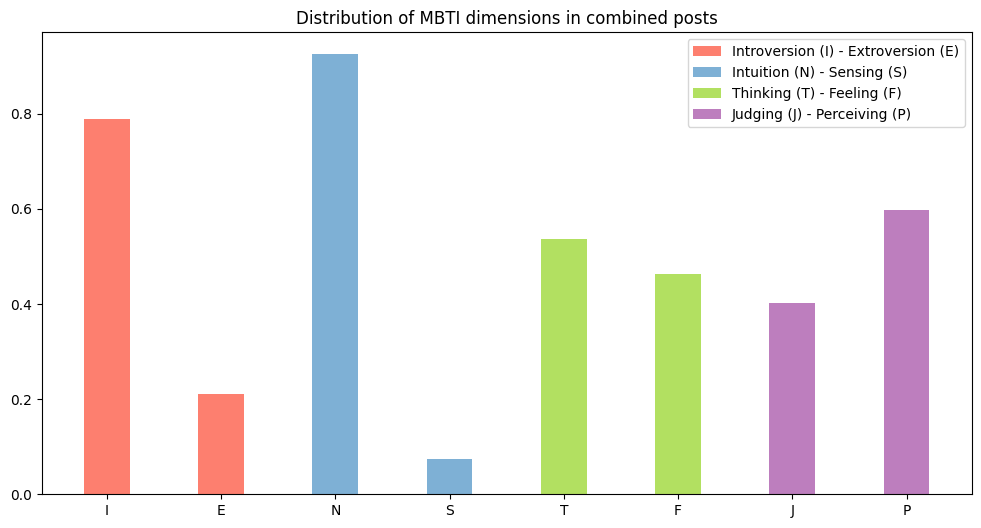

In [12]:
# split the data into 4 columns
split_data(post_combined)

# plot a bar plot with the distribution of the different MBTI types for each dimension
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for i in range(4):
    data = post_combined[f"mbti_{i}"].value_counts(normalize=True).sort_index()
    values = [data.get('I', 0), data.get('E', 0)] if i == 0 else \
             [data.get('N', 0), data.get('S', 0)] if i == 1 else \
             [data.get('T', 0), data.get('F', 0)] if i == 2 else \
             [data.get('J', 0), data.get('P', 0)]
    
    ax.bar(np.arange(2) + i * 2, values, width=0.4, label=labels[i], color=colors[i])

# Set x-ticks and labels
ax.set_xticks(np.arange(8))
ax.set_xticklabels(['I', 'E', 'N', 'S', 'T', 'F', 'J', 'P'])
ax.set_title("Distribution of MBTI dimensions in combined posts")
ax.legend()


In [13]:
# print proportion of each dimension for the combined posts 
for i in range(4):
    data = post_combined[f"mbti_{i}"].value_counts(normalize=True).sort_index()
    print(f"Dimension {i}: {data}")


Dimension 0: mbti_0
E    0.211348
I    0.788652
Name: proportion, dtype: float64
Dimension 1: mbti_1
N    0.924903
S    0.075097
Name: proportion, dtype: float64
Dimension 2: mbti_2
F    0.464018
T    0.535982
Name: proportion, dtype: float64
Dimension 3: mbti_3
J    0.401455
P    0.598545
Name: proportion, dtype: float64


In [15]:
# Proportions for each MBTI dimension
proportions = {
    'mbti_0': {'E': 0.211348, 'I': 0.788652},
    'mbti_1': {'N': 0.924903, 'S': 0.075097},
    'mbti_2': {'F': 0.464018, 'T': 0.535982},
    'mbti_3': {'J': 0.401455, 'P': 0.598545}
}

# Function to calculate baseline F1 score
def calculate_baseline_f1(proportions):
    f1_scores = {}
    for dim, prop in proportions.items():
        r = max(prop.values())
        f1_scores[dim] = 2 * r / (1 + r)
    return f1_scores

# Calculate baseline F1 scores
baseline_f1_scores = calculate_baseline_f1(proportions)
for dim, score in baseline_f1_scores.items():
    print(f"Baseline F1 score for {dim}: {score}")

Baseline F1 score for mbti_0: 0.8818395081882894
Baseline F1 score for mbti_1: 0.9609866055588255
Baseline F1 score for mbti_2: 0.6979014076987881
Baseline F1 score for mbti_3: 0.7488622466055068
